In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
Nmics = 8               # number of mics
Nsamp = 100              # number of samples in time
src = (0, 0)            # Source: x,y coordinates
pitch = 0.1             # Spacing between microphones
dist_per_samp = 0.01     # proxy for sampling rate
C = 0.5                 # Speed of sound in the medium
SincP = 10.0             # Time dilation factor for sinc pulse: how narrow
obstacle = (3, -1)      # Location of point obstacle

In [5]:
mics = [(0, (i-(Nmics-1)/2)*pitch) for i in range(Nmics)]  # Locations of microphones
mics

[(0, -0.35000000000000003),
 (0, -0.25),
 (0, -0.15000000000000002),
 (0, -0.05),
 (0, 0.05),
 (0, 0.15000000000000002),
 (0, 0.25),
 (0, 0.35000000000000003)]

In [6]:
t = np.array([i*dist_per_samp/C for i in range(Nsamp)])     # time instants with spacing of dist_per_samp
# sinc wave with narrowness determined by parameter
def wsrc(t):
    return np.sinc(SincP*t)
amp = wsrc(t)

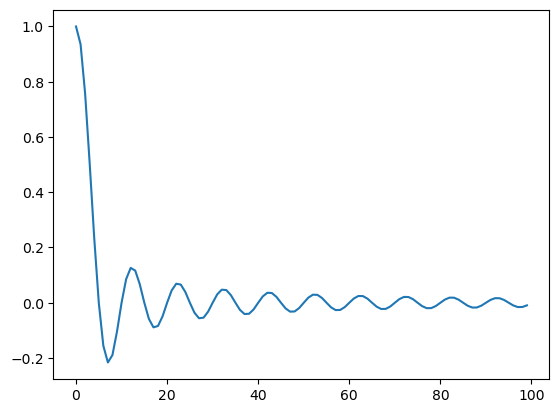

In [7]:
plt.figure()
plt.plot(amp)
plt.show()

In [8]:
# Distance from src to a mic after reflecting through pt
def dist(src, pt, mic):
    d1 = math.dist(src, pt)             # distance from src to pt
    d2 = math.dist(pt, mic)             # distance from pt to mic
    return d1 + d2

dist(src, obstacle, mics[0])

6.231886755802545

In [9]:
SincP = 5.0
dist_per_samp = 0.1
pitch = 0.1 ##### 0.1

Nmics = 64 ###### 64
Nsamp = 200
C = 2.0
obstacle = (3, -1)

mics = [(0, (i-(Nmics-1)/2)*pitch) for i in range(Nmics)]
# t = np.linspace(0, Nsamp, Nsamp) * dist_per_samp / C

# mics = zip(np.zeros(Nmics), (np.arange(Nmics) - (Nmics-1)/2) * pitch)
t = np.arange(Nsamp) * dist_per_samp / C

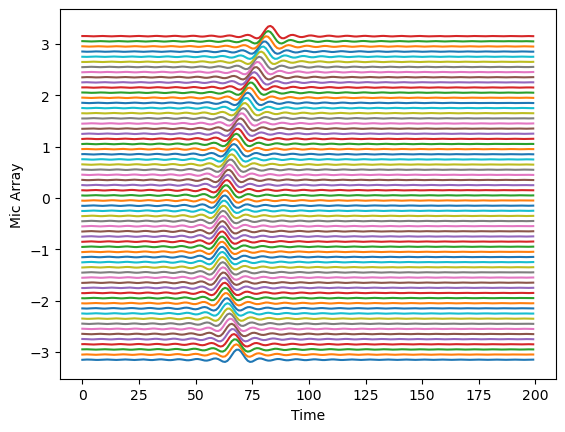

In [17]:
scale = 0.2                     # Scaling the amplitude in the plot
plt.figure()
for mic in mics:
    amplitude = wsrc(t - dist(src, obstacle, mic)/C) * scale
    plt.plot(amplitude + mic[1])
plt.xlabel("Time")
plt.ylabel("Mic Array")
plt.show()

In [19]:
mic[1]

3.1500000000000004

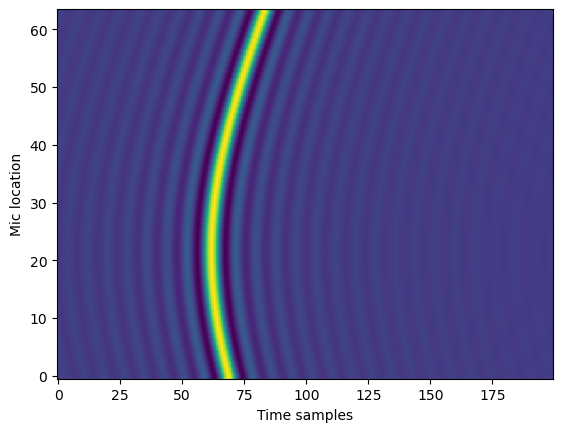

In [22]:
plt.figure()
heatmap_data = np.zeros((len(mics), len(t)))
for i, mic in enumerate(mics):
    for j, time in enumerate(t):
        amplitude = wsrc(time - dist(src, obstacle, mic) / C)
        heatmap_data[i, j] = amplitude
plt.xlabel("Time samples")
plt.ylabel("Mic location")
plt.imshow(heatmap_data, aspect='auto', cmap='viridis', origin='lower')

In [12]:
Y = np.linspace(mics[0][1], mics[Nmics-1][1], Nmics)
X = np.linspace(0, Nsamp * dist_per_samp / 2, Nsamp)        # Nsamp * dist_per_samp = t[-1] * C
# The "/ 2" in X is just to cutoff the remaining half of the plot which isn't needed
print(min(X), max(X), len(X))
print(min(Y), max(Y), len(Y))

0.0 10.0 200
-3.1500000000000004 3.1500000000000004 64


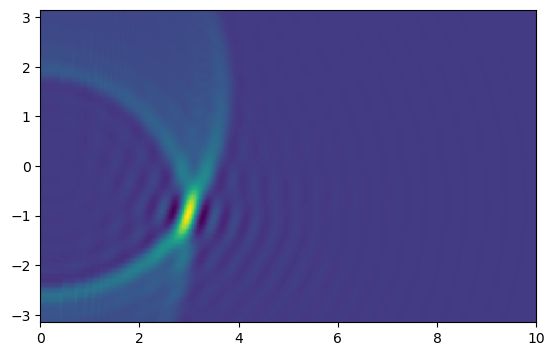

In [ ]:
heatmap_data = np.zeros((len(X), len(Y)))
for i, x in enumerate(X):
    for j, y in enumerate(Y):
        for mic in mics:
            time = dist(src, (x, y), mic) / C
            idx = np.searchsorted(t, time)
            heatmap_data[i, j] += wsrc(t[min(len(t)-1,idx)] - dist(src, obstacle, mic)/C)

plt.imshow( heatmap_data.T, cmap='viridis', origin='lower', extent=[X[0], X[-1], Y[0], Y[-1]])
# plt.colorbar()